In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

%matplotlib inline

In [75]:
df = pd.read_csv('./data/clean.csv')

In [76]:
df.head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price,ambrane,boat,...,Leather,Metal,Nylon,Other,Plastic,Rubber,Silicon,Stainless Steel,Synthetic,Thermo Plastic Polyurethene
0,0.111631,0.568365,0.833333,0.622082,0.129412,0.615385,0.772727,-13200.000001,False,False,...,False,False,False,False,False,False,True,False,False,False
1,0.034348,0.229960,0.416667,0.650096,0.341176,0.538462,0.409091,-5991.000000,False,True,...,False,False,False,False,False,False,True,False,False,False
2,0.025761,0.681053,0.833333,0.396295,0.129412,0.615385,1.000000,-18200.000000,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.017174,0.117609,0.666667,0.415958,0.341176,0.538462,0.409091,-3400.000000,False,False,...,False,False,False,True,False,False,False,False,False,False
4,0.012881,0.080047,0.583333,0.978720,0.341176,0.538462,0.409091,-2500.000000,False,False,...,False,False,False,True,False,False,False,False,False,False


In [77]:
df.shape

(181, 201)

In [78]:
X = df.drop('Discount Price', axis=1)
y = df['Discount Price']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training, 20% testing

R^2 (coefficient of determination) regression score function.^
<br> <br>
Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). In the general case when the true y is non-constant, a constant model that always predicts the average y disregarding the input features would get a R^2 score of 0.0.

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

res = r2_score(y_test, y_pred)
print(res)

-4266.854529814812


This negative value is very bad. This is because we use a small dataset and dimensions of data is very hard.

In [81]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
res = r2_score(y_test, y_pred)
print(res)

0.7327966020259958


Good r2 score but this model can be over-fitted as no such good score for a small dataset.

In [86]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
res = r2_score(y_test, y_pred)
print(res)

0.5551532175117351


In [83]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

res = r2_score(y_test, y_pred)
print(res)

0.6958960389142593


In [84]:
from sklearn.model_selection import cross_val_score
# splits the data into 5 parts and trains the model on 4 parts. repeats this 5 times, we then take the average of the 5 scores.
# cross validation to check how much over fitted the model is.

In [90]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
res = r2_score(y_test, y_pred)
print(res)

score = cross_val_score(dt_model, X, y, cv=5, scoring='r2')
#cv is number of splits
#scoring is the metric to be used

print('cross_val_score: ', score, score.mean(), score.std())

0.7753676230143399
cross_val_score:  [ 0.46983342  0.50056388  0.04285776 -0.26826364 -0.17270919] 0.11445644736239839 0.319198023415249


Very low score

In [91]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
res = r2_score(y_test, y_pred)
print(res)

score = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

print('cross_val_score: ', score, score.mean(), score.std())

0.5918511171900769
cross_val_score:  [0.48616226 0.80553997 0.44238756 0.54136783 0.76413386] 0.6079182969221342 0.14839915866222989


In [92]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
res = r2_score(y_test, y_pred)
print(res)

score = cross_val_score(model, X, y, cv=5, scoring='r2')

print('cross_val_score: ', score, score.mean(), score.std())

0.6958960389142593
cross_val_score:  [0.71687457 0.85160856 0.65360352 0.52677189 0.59881393] 0.6695344907745987 0.11047932405115406


XGBRegressor is a gradient boosting regressor. It is the best algorithm for this dataset <br> <br>
So next we have to do - Hyperparameter tuning is the process of finding the best hyperparameters for a model.
Hyperparameters are the configuration settings used to tune the training algorithm.

In [93]:
from sklearn.model_selection import GridSearchCV

In [95]:
param_gird = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_gird, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = xgb.XGBRegressor(**best_params)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.7460260949741992


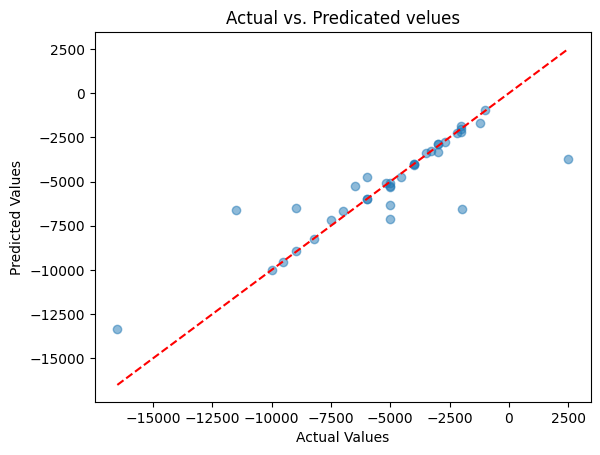

In [96]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(y_test, y_pred, alpha=0.5)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', linestyle='--')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicated velues')
plt.show()

Next we save and load the data. <br>
The pickle module is used for serializing and deserializing Python objects.

In [100]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

#Opens a file named model.pkl in write-binary mode and saves (dumps) the best_model object into it.

In [101]:
with open('model.pkl', 'rb') as f:
    xgb_model = pickle.load(f)

#Opens a file named model.pkl in read-binary mode and loads the object from it into xgb_model.

In [99]:
y_pred = xgb_model.predict(X_test)

print(r2_score(y_test, y_pred))

0.7460260949741992
